# Week 3 - Classification

### Muhammad Danial bin Zulkifli (U2003961/1)

# Classification of Wine Quality

In [111]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')

In [112]:

winequality = pd.read_csv('winequality-white.csv', sep=';')

In [113]:
winequality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [114]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [115]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [116]:
data = winequality.drop('quality', axis=1)

# Use 'data' instead of 'winequality.data'
X = data

# Access 'quality' column directly from 'winequality'
y = winequality['quality']

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## 1 Exploratory Data Analysis

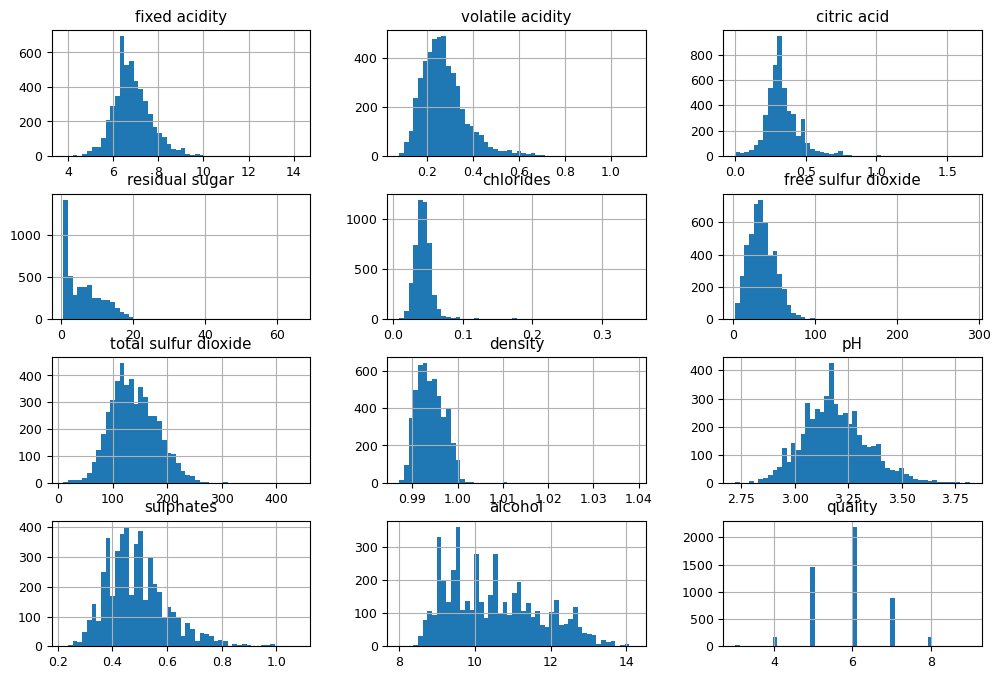

In [117]:
import matplotlib.pyplot as plt
winequality.hist(bins=50, figsize=(12, 8))
plt.show()

In [118]:
percentage = (winequality[winequality['quality'] >= 7].shape[0] / winequality.shape[0]) * 100
print('Row percentage for quality more than 7:', percentage)


Row percentage for quality more than 7: 21.641486320947326


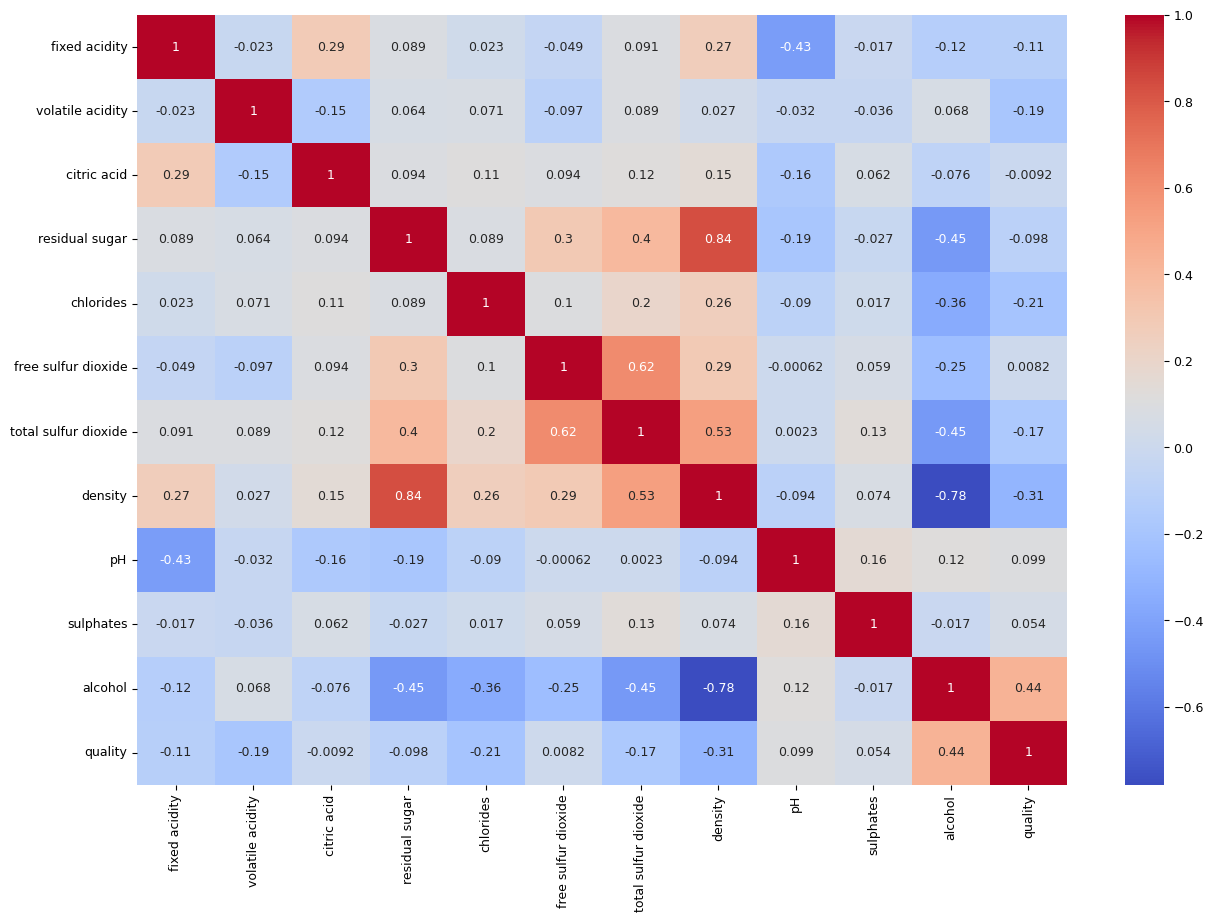

In [119]:
import seaborn as sns
corr_matrix = winequality.corr(numeric_only=True)
corr_matrix["quality"].sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [120]:
winequality['alcohol'].isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Name: alcohol, Length: 4898, dtype: bool>

In [121]:
winequality["quality_cat"] = pd.cut(winequality["quality"],
bins=[2, 4, 6, 8, np.inf],
labels=[1, 2, 3, 4])

from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
winequality, test_size=0.20, stratify=winequality["quality_cat"], random_state=42)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("quality_cat", axis=1, inplace=True)

## 2 Data Preprocessing

In [122]:
winequality["alchohol_density"] = winequality["alcohol"] / winequality["density"]
winequality["density_sugar"] = winequality["density"] / winequality["residual sugar"]

winequality['totals02_frees02'] = winequality['total sulfur dioxide'] / winequality["free sulfur dioxide"]


In [123]:
corr_matrix = winequality.corr(numeric_only=True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
alchohol_density        0.434966
pH                      0.099427
sulphates               0.053678
density_sugar           0.008996
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
totals02_frees02       -0.219177
density                -0.307123
Name: quality, dtype: float64

In [124]:
x_train = strat_train_set.drop("quality", axis=1)
y_train = strat_train_set["quality"].copy()
x_test = strat_test_set.drop("quality", axis=1)
y_test = strat_test_set["quality"].copy()

## 3 Training Binary Classifier and Performance Measures

In [125]:
# Convert the labels to binary, 0 for low quality and 1 for high quality
y_train_high_quality = y_train >= 7
y_test_high_quality = y_test >= 7

#### 3.1 Training With Different Algorithms

In [126]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [127]:
# SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_high_quality)

SGDClassifier(random_state=42)

In [128]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train_high_quality)

DecisionTreeClassifier()

In [129]:
# Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(x_train, y_train_high_quality)

RandomForestClassifier(random_state=42)

#### 3.2 Cross Validation Score, Precision, Recall, F1

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [131]:
model_comp={}

In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

def evaluate_model(model, model_name, X, y, cv=3):
    score = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    y_pred = cross_val_predict(model, X, y, cv=cv)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return [score, precision, recall, f1]

model_comp = {}

model_comp['SGD'] = evaluate_model(sgd_clf, 'SGD', x_train, y_train_high_quality)
model_comp['decision tree'] = evaluate_model(tree_clf, 'decision tree', x_train, y_train_high_quality)
model_comp['random forest'] = evaluate_model(forest_clf, 'random forest', x_train, y_train_high_quality)


In [133]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['CV Accuracy','Precision','Recall','F1_score']
df1.style.background_gradient(cmap='Greens')

,CV Accuracy,Precision,Recall,F1_score
SGD,0.786626,0.512295,0.294811,0.374251
decision tree,0.814957,0.553169,0.607311,0.578977
random forest,0.863706,0.774476,0.522406,0.623944


In [134]:
y_train_pred_sgd = cross_val_predict(sgd_clf, x_train, y_train_high_quality, cv=3)
y_train_pred_tree = cross_val_predict(tree_clf, x_train, y_train_high_quality, cv=3)
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train_high_quality, cv=3)

#### Random Forest has the highest score

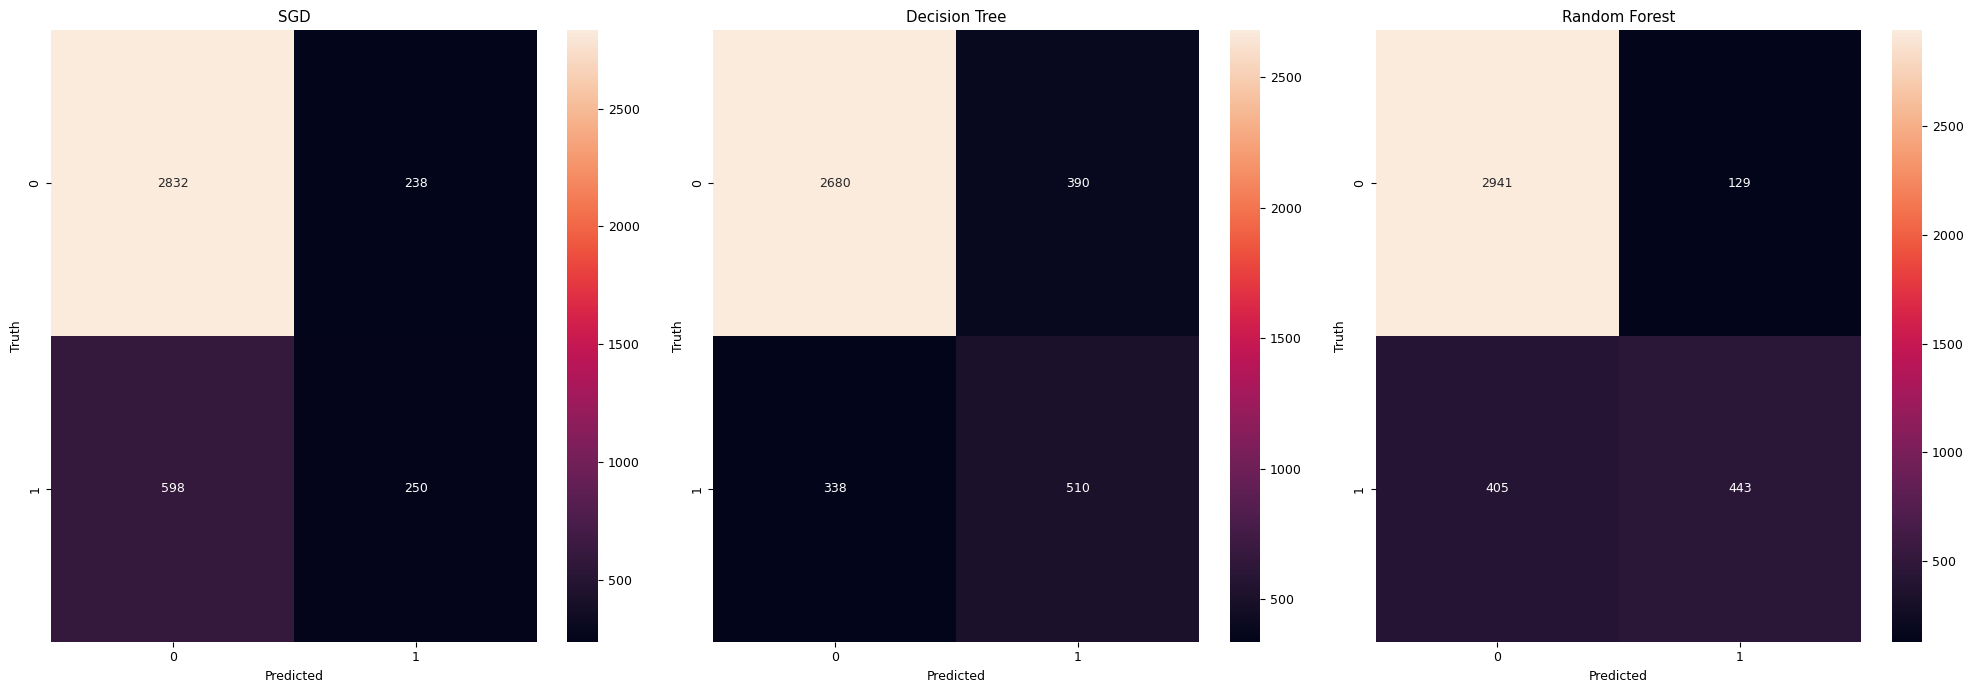

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_train_high_quality, y_train_pred_sgd)
cm_tree = confusion_matrix(y_train_high_quality, y_train_pred_tree)
cm_forest = confusion_matrix(y_train_high_quality, y_train_pred_forest)

plt.figure(figsize=(20,7))

# SGD
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_sgd, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SGD')

# Decision Tree
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot number 2
sns.heatmap(cm_tree, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')

# Random Forest
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot number 3
sns.heatmap(cm_forest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest')

plt.tight_layout()  # adjust spacing between plots to minimize the overlaps
plt.show()

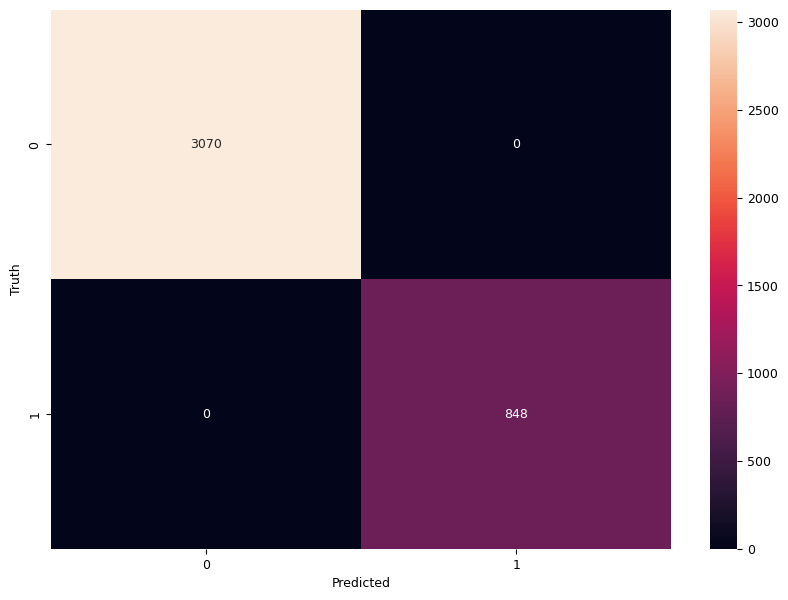

In [136]:
y_train_perfect_predictions = y_train_high_quality  # pretend we reached perfection

cm = confusion_matrix(y_train_high_quality, y_train_perfect_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Random Forest has the highest score

#### 3.3 Hypertuning

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'max_features': [2, 4, 6, 8, 10, 12, 14, 16,18,20]}
]

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train_high_quality)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'max_features': 2}


In [138]:
final_rf_model = RandomForestClassifier(**best_params)
final_rf_model.fit(x_train, y_train)

RandomForestClassifier(max_features=2)

In [139]:
from sklearn.metrics import classification_report

y_test_pred_forest_new = cross_val_predict(final_rf_model, x_test, y_test_high_quality, cv=3)
print(classification_report(y_test_high_quality, y_test_pred_forest_new))


              precision    recall  f1-score   support

       False       0.85      0.95      0.90       768
        True       0.70      0.40      0.51       212

    accuracy                           0.83       980
   macro avg       0.78      0.68      0.71       980
weighted avg       0.82      0.83      0.82       980



#### 3.2 Precision and Recall Trade off

In [140]:
y_scores = forest_clf.predict_proba(x_test)[:, 1]  # get probabilities for the positive class
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [141]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_high_quality, y_scores)

In [142]:
threshold = 0.35

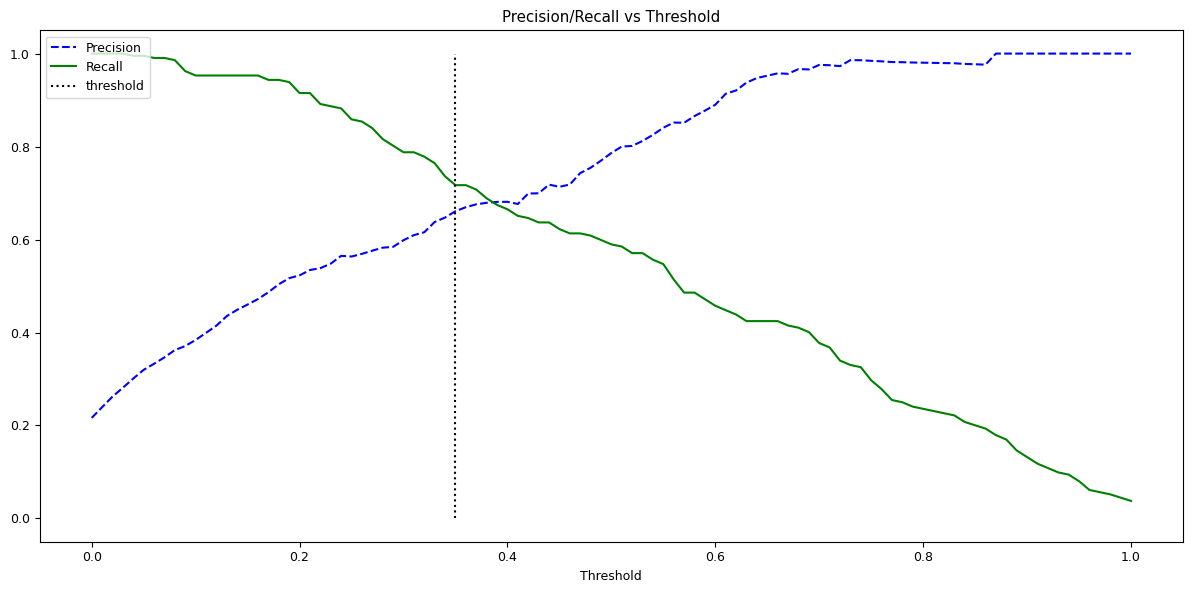

In [143]:
# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))

plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.xlabel('Threshold')
plt.legend(loc="upper left")
plt.title('Precision/Recall vs Threshold')

plt.tight_layout()
plt.show()

In [144]:
idx_for_70_precision = (precision >= 0.85).argmax()
threshold_for_70_precision = thresholds[idx_for_70_precision]
threshold_for_70_precision

0.56

In [145]:
y_train_pred_70 = (y_scores >= threshold_for_70_precision)

In [146]:
precision_score(y_test_high_quality, y_train_pred_70)

0.8515625

In [147]:
recall_at_70_precision = recall_score(y_test_high_quality, y_train_pred_70)
recall_at_70_precision

0.5141509433962265

In [148]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_high_quality, y_scores)

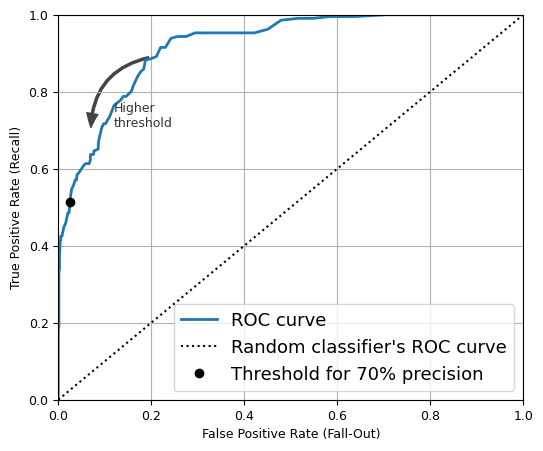

In [149]:
idx_for_threshold_at_70 = (thresholds <= threshold_for_70_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_70], fpr[idx_for_threshold_at_70]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 70% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

plt.show()

In [150]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_high_quality, y_scores)

0.921650820558176

In [151]:
y_pred = (y_scores >= threshold_for_70_precision).astype(int)


#### 3.3 Test Set Accuracy

Accuracy Before Trade Off

In [152]:
y_test_pred_forest = forest_clf.predict(x_test)

print("Before Trade Off")
print(classification_report(y_test_high_quality, y_test_pred_forest))


Before Trade Off
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       768
        True       0.80      0.58      0.68       212

    accuracy                           0.88       980
   macro avg       0.85      0.77      0.80       980
weighted avg       0.87      0.88      0.87       980



Accuracy After Trade Off

In [153]:
print("After Trade Off")
print(classification_report(y_test_high_quality, y_pred))


After Trade Off
              precision    recall  f1-score   support

       False       0.88      0.98      0.92       768
        True       0.85      0.51      0.64       212

    accuracy                           0.88       980
   macro avg       0.87      0.74      0.78       980
weighted avg       0.87      0.88      0.86       980



Accuracy and F1 score are the same before and after trade off however TN value is better after trade off as shown in confusion matrix below since it has higher recall value

Text(0.5, 1.0, 'Random Forest After Trade off')

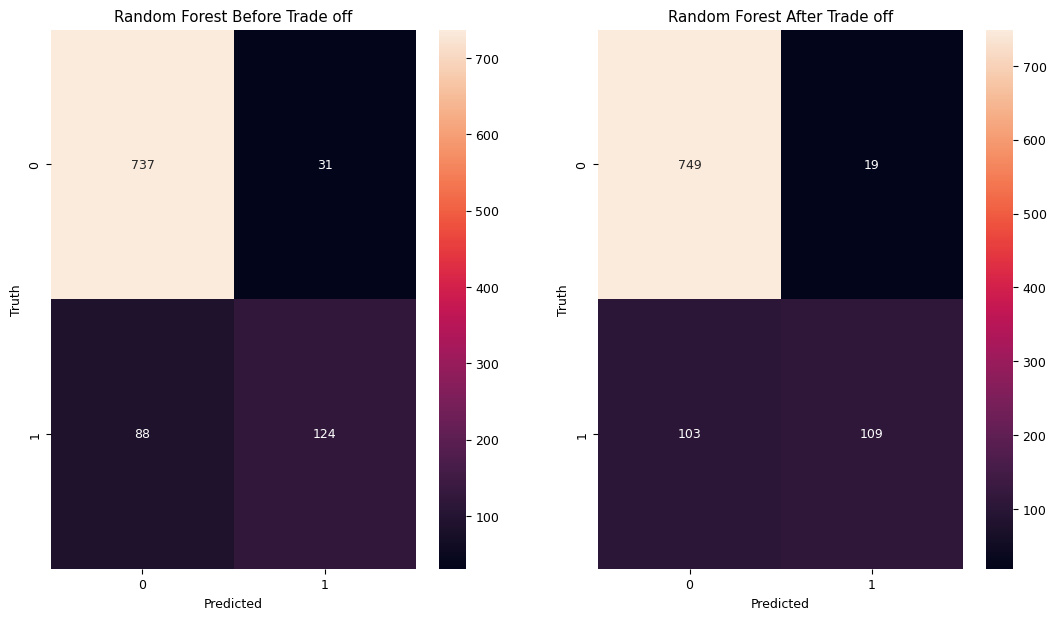

In [154]:
# Comparison of confusion matrix after and before trade off
cm_forest_tradeoff = confusion_matrix(y_test_high_quality, y_pred)
cm_forest = confusion_matrix(y_test_high_quality, y_test_pred_forest)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_forest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Before Trade off')


plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_forest_tradeoff, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest After Trade off')


In [155]:
from sklearn.metrics import accuracy_score

# Assuming y_test are your true labels
accuracy = accuracy_score(y_test_high_quality, y_test_pred_forest)
print(f'Accuracy of Binary Classification Random Forest: {accuracy* 100:.2f}%')

Accuracy of Binary Classification Random Forest: 87.86%


## 4 Multiclass Classification

In [156]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [157]:
# Function of score, precision,recall,f1

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

def evaluate_model(model, model_name, X, y, cv=3):
    score = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    y_pred = cross_val_predict(model, X, y, cv=cv)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    return [score, precision, recall, f1]

In [158]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler())

def cat_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore"))

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())
    
preprocessing = ColumnTransformer([
("alcohol_density", ratio_pipeline(),
 ["alcohol", "density"]),
],remainder=default_num_pipeline())
# remaining col: housing_median_age

housing_prepared = preprocessing.fit_transform(x_train)
housing_prepared.shape

(3918, 10)

#### 4.1 One vs One

In [159]:
OvO_clf_SGD = OneVsOneClassifier(SGDClassifier(random_state=42))
OvO_clf_SGD.fit(x_train, y_train)

OvO_clf_tree = OneVsOneClassifier(tree.DecisionTreeClassifier())
OvO_clf_tree.fit(x_train, y_train)

OvO_clf_forest = OneVsOneClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
OvO_clf_forest.fit(x_train, y_train)

OvO_clf_SVM = OneVsOneClassifier(svm.SVC())
OvO_clf_SVM.fit(x_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [160]:
model_comp_OvO = {}

model_comp_OvO['OvO_SGD'] = evaluate_model(OvO_clf_SGD, 'OvO_SGD', x_train, y_train)
model_comp_OvO['OvO_decision tree'] = evaluate_model(OvO_clf_tree, 'OvO_decision tree', x_train, y_train)
model_comp_OvO['OvO_random forest'] = evaluate_model(OvO_clf_forest, 'random forest', x_train, y_train)
model_comp_OvO['OvO_SVM'] = evaluate_model(OvO_clf_SVM, 'SVM', x_train, y_train)

In [161]:
df2=pd.DataFrame.from_dict(model_comp_OvO).T
df2.columns=['CV Accuracy','Precision','Recall','F1_score']
df2.style.background_gradient(cmap='Greens')

,CV Accuracy,Precision,Recall,F1_score
OvO_SGD,0.360133,0.202576,0.172216,0.158165
OvO_decision tree,0.559980,0.329169,0.324118,0.321409
OvO_random forest,0.642164,0.464534,0.328969,0.360921
OvO_SVM,0.451761,0.127398,0.145127,0.099625


#### 4.2 One Vs Rest

In [162]:
OvR_clf_SGD = OneVsRestClassifier(SGDClassifier(random_state=42))
OvR_clf_SGD.fit(x_train, y_train)

OvR_clf_tree = OneVsRestClassifier(tree.DecisionTreeClassifier())
OvR_clf_tree.fit(x_train, y_train)

OvR_clf_forest = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
OvR_clf_forest.fit(x_train, y_train)

OvR_clf_SVM = OneVsRestClassifier(svm.SVC())
OvR_clf_SVM.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [163]:
model_comp_OvR = {}

model_comp_OvR['OvR_SGD'] = evaluate_model(OvR_clf_SGD, 'OvR_SGD', x_train, y_train)
model_comp_OvR['OvR_decision tree'] = evaluate_model(OvR_clf_tree, 'OvR_decision tree', x_train, y_train)
model_comp_OvR['OvR_random forest'] = evaluate_model(OvR_clf_forest, 'random forest', x_train, y_train)
model_comp_OvR['OvR_SVM'] = evaluate_model(OvR_clf_SVM, 'SVM', x_train, y_train)

In [164]:
df3=pd.DataFrame.from_dict(model_comp_OvR).T
df3.columns=['CV Accuracy','Precision','Recall','F1_score']
df3.style.background_gradient(cmap='Greens')

,CV Accuracy,Precision,Recall,F1_score
OvR_SGD,0.402757,0.166650,0.198858,0.168493
OvR_decision tree,0.474732,0.356182,0.271547,0.299598
OvR_random forest,0.650842,0.474122,0.337248,0.369303
OvR_SVM,0.447933,0.176218,0.170450,0.155233


Random Forest OvR and OVO has higher accuracy compared to others

#### 4.3 Improving Accuracy

In [165]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("OvR_random_forest", OneVsRestClassifier(RandomForestClassifier())),
])

OvR Grid Search

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'OvR_random_forest__estimator__max_features': [2,4,6,8,10,12,14,16]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='accuracy')

grid_search.fit(x_train, y_train)
final_model2 = grid_search.best_estimator_

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
best_hyperparameters_grid = grid_search.best_params_
best_max_features = best_hyperparameters_grid['OvR_random_forest__estimator__max_features']

# Get the feature importances from the first classifier
importances = final_model2.named_steps['OvR_random_forest'].estimators_[0].feature_importances_

# Print the sorted feature importances
sorted(zip(importances, final_model2.named_steps['preprocessing'].get_feature_names_out()), reverse=True)

[(0.15719662881797855, 'remainder__free sulfur dioxide'),
 (0.14656619096881537, 'remainder__total sulfur dioxide'),
 (0.1357361351344683, 'remainder__fixed acidity'),
 (0.1347781751313767, 'alcohol_density__ratio'),
 (0.09399012774278966, 'remainder__residual sugar'),
 (0.07761632741224124, 'remainder__pH'),
 (0.07463278644574348, 'remainder__chlorides'),
 (0.06396276002766316, 'remainder__sulphates'),
 (0.06305065347434283, 'remainder__volatile acidity'),
 (0.052470214844580775, 'remainder__citric acid')]

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'OvR_random_forest__estimator__max_features': randint(1, 17)
}

random_search = RandomizedSearchCV(full_pipeline, param_distributions=param_dist, cv=3, scoring='accuracy', n_iter=10, random_state=42)

random_search.fit(x_train, y_train)
final_model = random_search.best_estimator_

cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
best_hyperparameters_random = random_search.best_params_
best_max_features = best_hyperparameters_random['OvR_random_forest__estimator__max_features']

# Get the feature importances from the first classifier
importances = final_model.named_steps['OvR_random_forest'].estimators_[0].feature_importances_

# Print the sorted feature importances
sorted(zip(importances, final_model.named_steps['preprocessing'].get_feature_names_out()), reverse=True)

[(0.16255247757796912, 'remainder__free sulfur dioxide'),
 (0.16034801663087847, 'remainder__total sulfur dioxide'),
 (0.1413467083517281, 'alcohol_density__ratio'),
 (0.12104030689956527, 'remainder__fixed acidity'),
 (0.11077441938773154, 'remainder__residual sugar'),
 (0.09492667606458884, 'remainder__chlorides'),
 (0.07066205123642219, 'remainder__pH'),
 (0.051042276620190064, 'remainder__sulphates'),
 (0.04936572309179362, 'remainder__citric acid'),
 (0.03794134413913292, 'remainder__volatile acidity')]

In [168]:

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100,class_weight = 'balanced', random_state=42))

clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     random_state=42))

In [169]:
model_comp_OvR_fix = {}
model_comp_OvR_fix['RandomForest OvR original'] = evaluate_model(OvR_clf_forest, 'randomforest', x_train, y_train)
model_comp_OvR_fix['RandomForest OvR grid'] = evaluate_model(final_model2, 'randomforest', x_train, y_train)
model_comp_OvR_fix['RandomForest OvR randomized'] = evaluate_model(final_model, 'randomforest', x_train, y_train)

df4=pd.DataFrame.from_dict(model_comp_OvR_fix).T
df4.columns=['CV Accuracy','Precision','Recall','F1_score']
df4.style.background_gradient(cmap='Greens')


,CV Accuracy,Precision,Recall,F1_score
RandomForest OvR original,0.650842,0.474122,0.337248,0.369303
RandomForest OvR grid,0.642930,0.485990,0.327531,0.360292
RandomForest OvR randomized,0.640378,0.454895,0.334124,0.363930


Cross Validation accuracy after hypertuning less than original

#### 4.4 Test Set Accuracy

In [170]:
y_test_pred = OvR_clf_forest.predict(x_test)

print("Before Trade Off")
print(classification_report(y_test, y_test_pred))

Before Trade Off
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.56      0.29      0.38        34
           5       0.74      0.69      0.71       302
           6       0.65      0.81      0.72       429
           7       0.71      0.55      0.62       172
           8       1.00      0.36      0.53        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69       980
   macro avg       0.52      0.38      0.42       980
weighted avg       0.69      0.69      0.68       980



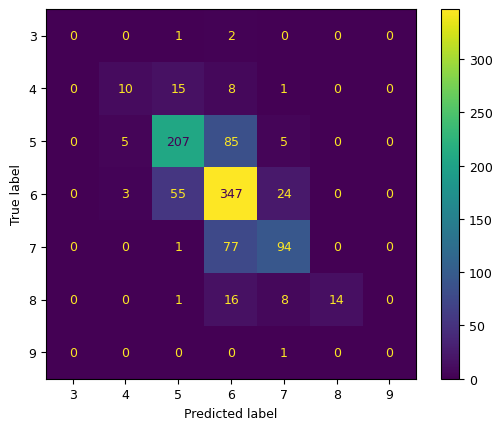

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

In [172]:
from sklearn.metrics import accuracy_score

# Assuming y_test are your true labels
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy of OvR Random Forest: {accuracy* 100:.2f}%')

Accuracy of OvR Random Forest: 68.57%


#### 5 Importance of Features

Binary Classification

                 feature  importance
10               alcohol    0.154948
7                density    0.123207
4              chlorides    0.088251
1       volatile acidity    0.087034
3         residual sugar    0.084961
8                     pH    0.083657
5    free sulfur dioxide    0.083057
6   total sulfur dioxide    0.082938
9              sulphates    0.075376
2            citric acid    0.068982
0          fixed acidity    0.067589


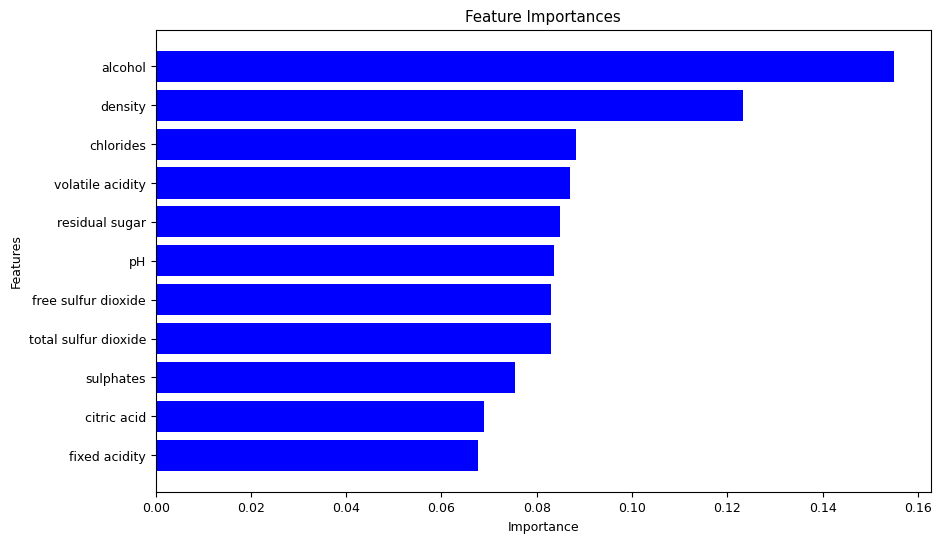

In [173]:

# Get the feature importances
importances = forest_clf.feature_importances_

# Assuming features is the list of feature names
features = list(x_train.columns)

# Create a DataFrame from the importances
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='b', align='center')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

Multiclass Classification

                 feature  importance
6   total sulfur dioxide    0.176325
5    free sulfur dioxide    0.155495
0          fixed acidity    0.124484
10               alcohol    0.101146
3         residual sugar    0.090752
8                     pH    0.074521
4              chlorides    0.068142
7                density    0.066288
9              sulphates    0.053884
2            citric acid    0.046119
1       volatile acidity    0.042842


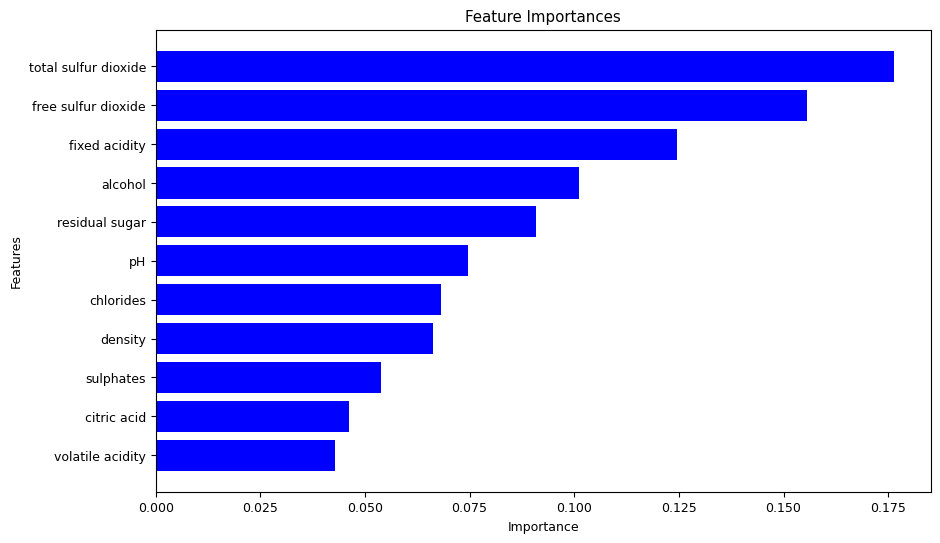

In [174]:

# Get the feature importances
importances = OvR_clf_forest.estimators_[0].feature_importances_

# Assuming features is the list of feature names
features = list(x_train.columns)

# Create a DataFrame from the importances
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='b', align='center')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()